## 第零步：分析库导入与分析目标设置
为了更方便地进行数据处理与分析，我们定义了一个基类`DataframeAnalysis`,将输入数据统一处理成`pandas.DataFrame`格式.

目前支持的数据格式有：
- `csv`
- `xlsx`
- `parquet`

输入参数有：
- `root_path`: 所有数据存放的根路径
- `data_path`: 各个数据集在根路径下的子路径

In [1]:
pwd

'/Users/yumeng/Desktop/Data-Process-Library/example/XiexinForecasting/PhotovoltaicPower'

In [2]:
from Analysis.DataframeAnalysis import DataframeAnalysis
import plotly.express as px
import pandas as pd
import os
import plotly.graph_objects as go
# 导入中冶赛迪高炉应用数据
root_path = '/Users/yumeng/Desktop/data/Xiexindata/photovoltaic_power_plant_data'
data_path = 'ps_id_11941_merged.csv'
df = pd.read_csv(os.path.join(root_path, data_path), encoding='utf-8')
DA = DataframeAnalysis(dataFrame=df)
DA.root_path = root_path
DA.data_path = data_path

DataAnalysis loading data from DataFrame with shape: (73102, 30)


In [3]:
# 获得所有列名
DA.df_raw.columns

Index(['sn', 'ts', 'er', 'pac', 'lng', 'lat', 'roof_type', 'angle',
       'temperature_2m', 'relative_humidity_2m', 'dew_point_2m',
       'pressure_msl', 'surface_pressure', 'precipitation_probability',
       'cloud_cover', 'cloud_cover_low', 'cloud_cover_mid', 'cloud_cover_high',
       'shortwave_radiation', 'direct_radiation', 'direct_normal_irradiance',
       'diffuse_radiation', 'wind_speed_10m', 'wind_speed_80m',
       'wind_speed_120m', 'wind_direction_10m', 'wind_direction_80m',
       'wind_direction_120m', 'variable_date', 'full_time'],
      dtype='object')

In [4]:
DA.df_raw

sn                   ts   er   pac        lng  \
0      GSABZT015K000A231007044  2024-04-30 16:00:00  NaN  0.60  114.28455   
1      GSABZT015K000A231007044  2024-04-30 16:05:00  NaN  0.53  114.28455   
2      GSABZT015K000A231007044  2024-04-30 16:10:00  NaN  0.44  114.28455   
3      GSABZT015K000A231007044  2024-04-30 16:15:00  NaN  0.37  114.28455   
4      GSABZT015K000A231007044  2024-04-30 16:20:00  NaN  0.30  114.28455   
...                        ...                  ...  ...   ...        ...   
73097  GSABZT015K000A231007044  2025-05-10 19:20:00  0.0  0.00  114.28455   
73098  GSABZT015K000A231007044  2025-05-10 19:25:00  0.0  0.00  114.28455   
73099  GSABZT015K000A231007044  2025-05-10 19:30:00  0.0  0.00  114.28455   
73100  GSABZT015K000A231007044  2025-05-10 19:35:00  0.0  0.00  114.28455   
73101  GSABZT015K000A231007044  2025-05-10 19:40:00  0.0  0.00  114.28455   

            lat roof_type  angle  temperature_2m  relative_humidity_2m  ...  \
0      30.23268     斜屋顶双坡   15.0         15.5611               88.3501  ...   
1      30.23268     斜屋顶双坡   15.0             NaN                   NaN  ...   
2      30.23268     斜屋顶双坡   15.0             NaN                   NaN  ...   
3      30.23268     斜屋顶双坡   15.0         15.4518               88.4805  ...   
4      30.23268     斜屋顶双坡   15.0             NaN                   NaN  ...   
...         ...       ...    ...             ...                   ...  ...   
73097  30.23268     斜屋顶双坡   15.0             NaN                   NaN  ...   
73098  30.23268     斜屋顶双坡   15.0             NaN                   NaN  ...   
73099  30.23268     斜屋顶双坡   15.0         17.0830               66.5276  ...   
73100  30.23268     斜屋顶双坡   15.0             NaN                   NaN  ...   
73101  30.23268     斜屋顶双坡   15.0             NaN                   NaN  ...   

       direct_normal_irradiance  diffuse_radiation  wind_speed_10m  \
0                           0.0            58.2696          5.9986   
1                           NaN                NaN             NaN   
2                           NaN                NaN             NaN   
3                           0.0            49.5514          5.9609   
4                           NaN                NaN             NaN   
...                         ...                ...             ...   
73097                       NaN                NaN             NaN   
73098                       NaN                NaN             NaN   
73099                       0.0             0.0000          1.9446   
73100                       NaN                NaN             NaN   
73101                       NaN                NaN             NaN   

       wind_speed_80m  wind_speed_120m  wind_direction_10m  \
0              8.6697           9.3160             74.9129   
1                 NaN              NaN                 NaN   
2                 NaN              NaN                 NaN   
3              8.7206           9.3929             75.1012   
4                 NaN              NaN                 NaN   
...               ...              ...                 ...   
73097             NaN              NaN                 NaN   
73098             NaN              NaN                 NaN   
73099          4.3484           5.0874            218.6140   
73100             NaN              NaN                 NaN   
73101             NaN              NaN                 NaN   

       wind_direction_80m  wind_direction_120m        variable_date  \
0                  4.5717               5.1585  2024-04-30 16:00:00   
1                     NaN                  NaN                  NaN   
2                     NaN                  NaN                  NaN   
3                  4.7476               5.3233  2024-04-30 16:15:00   
4                     NaN                  NaN                  NaN   
...                   ...                  ...                  ...   
73097                 NaN                  NaN                  NaN   


In [5]:
DA.plot_column_plotly(columns=['pac'], start_point=0, length=100000)

## 第一步：对齐时间戳
按照功率数据的标准，插值为5min频率

In [6]:
#检查full_time是否全是5min间隔


import pandas as pd

# 确保 full_time 为 datetime 类型
df['full_time'] = pd.to_datetime(df['full_time'])

# 创建严格的 5 分钟间隔时间戳，起止时间取自原 full_time 范围
new_full_time = pd.date_range(
    start=df['full_time'].min(),
    end=df['full_time'].max(),
    freq='5min'  # 推荐用 '5min' 替代 '5T'
)

# 替换旧的 full_time 或创建一个新列
df = df.set_index('full_time')         # 将 full_time 设为索引
df = df.reindex(new_full_time)         # 按严格 5min 间隔重建索引
df.index.name = 'full_time'            # 恢复索引名
df = df.reset_index()                  # 如需使用为普通列

# 保存回 DA.df_raw
DA.df_raw = df



DA.df_raw

full_time                       sn                   ts   er  \
0      2024-04-30 16:00:00  GSABZT015K000A231007044  2024-04-30 16:00:00  NaN   
1      2024-04-30 16:05:00  GSABZT015K000A231007044  2024-04-30 16:05:00  NaN   
2      2024-04-30 16:10:00  GSABZT015K000A231007044  2024-04-30 16:10:00  NaN   
3      2024-04-30 16:15:00  GSABZT015K000A231007044  2024-04-30 16:15:00  NaN   
4      2024-04-30 16:20:00  GSABZT015K000A231007044  2024-04-30 16:20:00  NaN   
...                    ...                      ...                  ...  ...   
108040 2025-05-10 19:20:00  GSABZT015K000A231007044  2025-05-10 19:20:00  0.0   
108041 2025-05-10 19:25:00  GSABZT015K000A231007044  2025-05-10 19:25:00  0.0   
108042 2025-05-10 19:30:00  GSABZT015K000A231007044  2025-05-10 19:30:00  0.0   
108043 2025-05-10 19:35:00  GSABZT015K000A231007044  2025-05-10 19:35:00  0.0   
108044 2025-05-10 19:40:00  GSABZT015K000A231007044  2025-05-10 19:40:00  0.0   

         pac        lng       lat roof_type  angle  temperature_2m  ...  \
0       0.60  114.28455  30.23268     斜屋顶双坡   15.0         15.5611  ...   
1       0.53  114.28455  30.23268     斜屋顶双坡   15.0             NaN  ...   
2       0.44  114.28455  30.23268     斜屋顶双坡   15.0             NaN  ...   
3       0.37  114.28455  30.23268     斜屋顶双坡   15.0         15.4518  ...   
4       0.30  114.28455  30.23268     斜屋顶双坡   15.0             NaN  ...   
...      ...        ...       ...       ...    ...             ...  ...   
108040  0.00  114.28455  30.23268     斜屋顶双坡   15.0             NaN  ...   
108041  0.00  114.28455  30.23268     斜屋顶双坡   15.0             NaN  ...   
108042  0.00  114.28455  30.23268     斜屋顶双坡   15.0         17.0830  ...   
108043  0.00  114.28455  30.23268     斜屋顶双坡   15.0             NaN  ...   
108044  0.00  114.28455  30.23268     斜屋顶双坡   15.0             NaN  ...   

        direct_radiation  direct_normal_irradiance  diffuse_radiation  \
0                    0.0                       0.0            58.2696   
1                    NaN                       NaN                NaN   
2                    NaN                       NaN                NaN   
3                    0.0                       0.0            49.5514   
4                    NaN                       NaN                NaN   
...                  ...                       ...                ...   
108040               NaN                       NaN                NaN   
108041               NaN                       NaN                NaN   
108042               0.0                       0.0             0.0000   
108043               NaN                       NaN                NaN   
108044               NaN                       NaN                NaN   

        wind_speed_10m  wind_speed_80m  wind_speed_120m  wind_direction_10m  \
0               5.9986          8.6697           9.3160             74.9129   
1                  NaN             NaN              NaN                 NaN   
2                  NaN             NaN              NaN                 NaN   
3               5.9609          8.7206           9.3929             75.1012   
4                  NaN             NaN              NaN                 NaN   
...                ...             ...              ...                 ...   
108040             NaN             NaN              NaN                 NaN   
108041             NaN             NaN              NaN                 NaN   
108042          1.9446          4.3484           5.0874            218.6140   
108043             NaN             NaN              NaN                 NaN   
108044             NaN             NaN              NaN                 NaN   

        wind_direction_80m  wind_direction_120m        variable_date  
0                   4.5717               5.1585  2024-04-30 16:00:00  
1                      NaN                  NaN                  NaN  
2                      NaN                  NaN                  NaN  
3                   4.7476       

## 第二步：缺失值分析

检查数据集中有无缺失值，包括：
- 缺失的特征值
- 缺失的时间戳

In [7]:
# 获得'sn'列包含缺失值的index条目
DA.getNanIndex(start_col='sn',end_col='sn')

(Index([    42,     43,     44,     45,     46,     47,     48,     49,     50,
            51,
        ...
        107864, 107865, 107866, 107867, 107868, 107869, 107870, 107871, 107872,
        107873],
       dtype='int64', length=52433),
 True)

In [8]:
# 'sn'列值都是一样的，用上一行值进行填充
DA.df_raw[['sn']] = DA.df_raw[['sn']].ffill()

In [9]:
# 检查'sn'列空值情况
DA.getNanIndex(start_col='sn',end_col='sn')

(Index([], dtype='int64'), False)

In [10]:
# 获得'ts'列包含缺失值的index条目
DA.getNanIndex(start_col='ts',end_col='ts')

(Index([    42,     43,     44,     45,     46,     47,     48,     49,     50,
            51,
        ...
        107864, 107865, 107866, 107867, 107868, 107869, 107870, 107871, 107872,
        107873],
       dtype='int64', length=52433),
 True)

In [11]:
DA.df_raw['ts'] = DA.df_raw['ts'].fillna(DA.df_raw['full_time'])

In [12]:
# 检查'ts'列空值情况
DA.getNanIndex(start_col='ts',end_col='ts')

(Index([], dtype='int64'), False)

In [13]:
# 获得'er'列包含缺失值的index条目
DA.getNanIndex(start_col='er',end_col='er')

(Index([     0,      1,      2,      3,      4,      5,      6,      7,      8,
             9,
        ...
        107864, 107865, 107866, 107867, 107868, 107869, 107870, 107871, 107872,
        107873],
       dtype='int64', length=53547),
 True)

In [14]:
# 'er'列空值和 0 值都代表无异常，将所有空值全部填充为 0 值
DA.df_raw.loc[:, 'er': 'er'] = DA.df_raw.loc[:, 'er': 'er'].fillna(0)

In [15]:
# 检查'er'列空值情况
DA.getNanIndex(start_col='er',end_col='er')

(Index([], dtype='int64'), False)

In [16]:
# 检查'pac'列空值情况
DA.getNanIndex(start_col='pac',end_col='pac')

(Index([    42,     43,     44,     45,     46,     47,     48,     49,     50,
            51,
        ...
        107864, 107865, 107866, 107867, 107868, 107869, 107870, 107871, 107872,
        107873],
       dtype='int64', length=52433),
 True)

In [17]:
# 'pac'列空值和 0 值都代表无异常，将所有空值全部填充为 0 值
DA.df_raw.loc[:, 'pac': 'pac'] = DA.df_raw.loc[:, 'pac': 'pac'].fillna(0)

In [18]:
# 检查'pac'列空值情况
DA.getNanIndex(start_col='pac',end_col='pac')

(Index([], dtype='int64'), False)

In [19]:
# 检查'lng', 'lat', 'roof_type', 'angle'列的空值情况
DA.getNanIndex(start_col='lng',end_col='angle')

(Index([    42,     43,     44,     45,     46,     47,     48,     49,     50,
            51,
        ...
        107864, 107865, 107866, 107867, 107868, 107869, 107870, 107871, 107872,
        107873],
       dtype='int64', length=52433),
 True)

In [20]:
# 'lng', 'lat', 'roof_type', 'angle'列值都是一样的，用上一行值进行填充
DA.df_raw[['lng', 'lat', 'roof_type', 'angle']] = DA.df_raw[['lng', 'lat', 'roof_type', 'angle']].ffill()

In [21]:
# 检查'lng', 'lat', 'roof_type', 'angle'列的空值情况
DA.getNanIndex(start_col='lng',end_col='angle')

(Index([], dtype='int64'), False)

In [22]:
# 检查气象数据列的空值情况
DA.getNanIndex(start_col='temperature_2m',end_col='wind_direction_120m')

(Index([     1,      2,      4,      5,      7,      8,     10,     11,     13,
            14,
        ...
        108031, 108032, 108034, 108035, 108037, 108038, 108040, 108041, 108043,
        108044],
       dtype='int64', length=72030),
 True)

In [23]:
# 对气象数据进行线性插值
DA.getInterpolate(start_col='temperature_2m', end_col='wind_direction_120m', method='linear')

kwargs: {'method': 'linear'}


full_time                       sn                   ts   er  \
0      2024-04-30 16:00:00  GSABZT015K000A231007044  2024-04-30 16:00:00  0.0   
1      2024-04-30 16:05:00  GSABZT015K000A231007044  2024-04-30 16:05:00  0.0   
2      2024-04-30 16:10:00  GSABZT015K000A231007044  2024-04-30 16:10:00  0.0   
3      2024-04-30 16:15:00  GSABZT015K000A231007044  2024-04-30 16:15:00  0.0   
4      2024-04-30 16:20:00  GSABZT015K000A231007044  2024-04-30 16:20:00  0.0   
...                    ...                      ...                  ...  ...   
108040 2025-05-10 19:20:00  GSABZT015K000A231007044  2025-05-10 19:20:00  0.0   
108041 2025-05-10 19:25:00  GSABZT015K000A231007044  2025-05-10 19:25:00  0.0   
108042 2025-05-10 19:30:00  GSABZT015K000A231007044  2025-05-10 19:30:00  0.0   
108043 2025-05-10 19:35:00  GSABZT015K000A231007044  2025-05-10 19:35:00  0.0   
108044 2025-05-10 19:40:00  GSABZT015K000A231007044  2025-05-10 19:40:00  0.0   

         pac        lng       lat roof_type  angle  temperature_2m  ...  \
0       0.60  114.28455  30.23268     斜屋顶双坡   15.0       15.561100  ...   
1       0.53  114.28455  30.23268     斜屋顶双坡   15.0       15.524667  ...   
2       0.44  114.28455  30.23268     斜屋顶双坡   15.0       15.488233  ...   
3       0.37  114.28455  30.23268     斜屋顶双坡   15.0       15.451800  ...   
4       0.30  114.28455  30.23268     斜屋顶双坡   15.0       15.374333  ...   
...      ...        ...       ...       ...    ...             ...  ...   
108040  0.00  114.28455  30.23268     斜屋顶双坡   15.0       17.302867  ...   
108041  0.00  114.28455  30.23268     斜屋顶双坡   15.0       17.192933  ...   
108042  0.00  114.28455  30.23268     斜屋顶双坡   15.0       17.083000  ...   
108043  0.00  114.28455  30.23268     斜屋顶双坡   15.0       17.083000  ...   
108044  0.00  114.28455  30.23268     斜屋顶双坡   15.0       17.083000  ...   

        direct_radiation  direct_normal_irradiance  diffuse_radiation  \
0                    0.0                       0.0          58.269600   
1                    0.0                       0.0          55.363533   
2                    0.0                       0.0          52.457467   
3                    0.0                       0.0          49.551400   
4                    0.0                       0.0          46.661700   
...                  ...                       ...                ...   
108040               0.0                       0.0           0.920933   
108041               0.0                       0.0           0.460467   
108042               0.0                       0.0           0.000000   
108043               0.0                       0.0           0.000000   
108044               0.0                       0.0           0.000000   

        wind_speed_10m  wind_speed_80m  wind_speed_120m  wind_direction_10m  \
0             5.998600        8.669700         9.316000           74.912900   
1             5.986033        8.686667         9.341633           74.975667   
2             5.973467        8.703633         9.367267           75.038433   
3             5.960900        8.720600         9.392900           75.101200   
4             5.951133        8.744900         9.427267           75.762700   
...                ...             ...              ...                 ...   
108040        1.967533        4.352133         5.081600          220.220267   
108041        1.956067        4.350267         5.084500          219.417133   
108042        1.944600        4.348400         5.087400          218.614000   
108043        1.944600        4.348400         5.087400          218.614000   
108044        1.944600        4.348400         5.087400          218.614000   

        wind_direction_80m  wind_direction_120m        variable_date  
0                 4.571700             5.158500  2024-04-30 16:00:00  
1                 4.630333             5.213433                  NaN  
2                 4.688967             5.268367                  NaN  
3                 4.747600       

In [24]:
# 检查气象数据列的空值情况
DA.getNanIndex(start_col='temperature_2m',end_col='wind_direction_120m')

(Index([], dtype='int64'), False)

In [25]:
DA.df_raw['variable_date'] = DA.df_raw['variable_date'].fillna(DA.df_raw['full_time'])

In [26]:
# 检查所有列的空值情况
DA.getNanIndex(start_col='sn',end_col='full_time')

(RangeIndex(start=0, stop=108045, step=1), True)

In [27]:
# 检查时间戳缺失情况
missing_dates, flag, timestamps, expected_range = DA.checkDateContinuity('ts', freq='5min')
print(f"Missing dates {flag}: {missing_dates}")

Missing dates True: DatetimeIndex([], dtype='datetime64[ns]', freq='5min')


In [28]:
DA.df_raw=DA.df_raw.set_index(timestamps)
DA.df_raw

full_time                       sn  \
ts                                                                 
2024-04-30 16:00:00 2024-04-30 16:00:00  GSABZT015K000A231007044   
2024-04-30 16:05:00 2024-04-30 16:05:00  GSABZT015K000A231007044   
2024-04-30 16:10:00 2024-04-30 16:10:00  GSABZT015K000A231007044   
2024-04-30 16:15:00 2024-04-30 16:15:00  GSABZT015K000A231007044   
2024-04-30 16:20:00 2024-04-30 16:20:00  GSABZT015K000A231007044   
...                                 ...                      ...   
2025-05-10 19:20:00 2025-05-10 19:20:00  GSABZT015K000A231007044   
2025-05-10 19:25:00 2025-05-10 19:25:00  GSABZT015K000A231007044   
2025-05-10 19:30:00 2025-05-10 19:30:00  GSABZT015K000A231007044   
2025-05-10 19:35:00 2025-05-10 19:35:00  GSABZT015K000A231007044   
2025-05-10 19:40:00 2025-05-10 19:40:00  GSABZT015K000A231007044   

                                     ts   er   pac        lng       lat  \
ts                                                                        
2024-04-30 16:00:00 2024-04-30 16:00:00  0.0  0.60  114.28455  30.23268   
2024-04-30 16:05:00 2024-04-30 16:05:00  0.0  0.53  114.28455  30.23268   
2024-04-30 16:10:00 2024-04-30 16:10:00  0.0  0.44  114.28455  30.23268   
2024-04-30 16:15:00 2024-04-30 16:15:00  0.0  0.37  114.28455  30.23268   
2024-04-30 16:20:00 2024-04-30 16:20:00  0.0  0.30  114.28455  30.23268   
...                                 ...  ...   ...        ...       ...   
2025-05-10 19:20:00 2025-05-10 19:20:00  0.0  0.00  114.28455  30.23268   
2025-05-10 19:25:00 2025-05-10 19:25:00  0.0  0.00  114.28455  30.23268   
2025-05-10 19:30:00 2025-05-10 19:30:00  0.0  0.00  114.28455  30.23268   
2025-05-10 19:35:00 2025-05-10 19:35:00  0.0  0.00  114.28455  30.23268   
2025-05-10 19:40:00 2025-05-10 19:40:00  0.0  0.00  114.28455  30.23268   

                    roof_type  angle  temperature_2m  ...  direct_radiation  \
ts                                                    ...                     
2024-04-30 16:00:00     斜屋顶双坡   15.0       15.561100  ...               0.0   
2024-04-30 16:05:00     斜屋顶双坡   15.0       15.524667  ...               0.0   
2024-04-30 16:10:00     斜屋顶双坡   15.0       15.488233  ...               0.0   
2024-04-30 16:15:00     斜屋顶双坡   15.0       15.451800  ...               0.0   
2024-04-30 16:20:00     斜屋顶双坡   15.0       15.374333  ...               0.0   
...                       ...    ...             ...  ...               ...   
2025-05-10 19:20:00     斜屋顶双坡   15.0       17.302867  ...               0.0   
2025-05-10 19:25:00     斜屋顶双坡   15.0       17.192933  ...               0.0   
2025-05-10 19:30:00     斜屋顶双坡   15.0       17.083000  ...               0.0   
2025-05-10 19:35:00     斜屋顶双坡   15.0       17.083000  ...               0.0   
2025-05-10 19:40:00     斜屋顶双坡   15.0       17.083000  ...               0.0   

                     direct_normal_irradiance  diffuse_radiation  \
ts                                                                 
2024-04-30 16:00:00                       0.0          58.269600   
2024-04-30 16:05:00                       0.0          55.363533   
2024-04-30 16:10:00                       0.0          52.457467   
2024-04-30 16:15:00                       0.0          49.551400   
2024-04-30 16:20:00                       0.0          46.661700   
...                                       ...                ...   
2025-05-10 19:20:00                       0.0           0.920933   
2025-05-10 19:25:00                       0.0           0.460467   
2025-05-10 19:30:00                       0.0           0.000000   
2025-05-10 19:35:00                       0.0           0.000000   
2025-05-10 19:40:00                       0.0           0.000000   

                     wind_speed_10m  wind_speed_80m  wind_speed_120m  \
ts                                                                     
2024-04-30 16:00:00        5.998600        8.669700         9.316000   
2024-04-30 16:05:00        5.986033     

In [29]:
DA.df_raw = DA.df_raw.reindex(expected_range)

In [30]:
# 获取插入位置（wind_direction_120m 的索引 + 1）
insert_pos = DA.df_raw.columns.get_loc('wind_direction_120m') + 1

# 插入 'pac_copy' 列作为 'pac' 的副本
DA.df_raw.insert(loc=insert_pos, column='pac_copy', value=DA.df_raw['pac'])

In [31]:
DA.df_raw

full_time                       sn  \
2024-04-30 16:00:00 2024-04-30 16:00:00  GSABZT015K000A231007044   
2024-04-30 16:05:00 2024-04-30 16:05:00  GSABZT015K000A231007044   
2024-04-30 16:10:00 2024-04-30 16:10:00  GSABZT015K000A231007044   
2024-04-30 16:15:00 2024-04-30 16:15:00  GSABZT015K000A231007044   
2024-04-30 16:20:00 2024-04-30 16:20:00  GSABZT015K000A231007044   
...                                 ...                      ...   
2025-05-10 19:20:00 2025-05-10 19:20:00  GSABZT015K000A231007044   
2025-05-10 19:25:00 2025-05-10 19:25:00  GSABZT015K000A231007044   
2025-05-10 19:30:00 2025-05-10 19:30:00  GSABZT015K000A231007044   
2025-05-10 19:35:00 2025-05-10 19:35:00  GSABZT015K000A231007044   
2025-05-10 19:40:00 2025-05-10 19:40:00  GSABZT015K000A231007044   

                                     ts   er   pac        lng       lat  \
2024-04-30 16:00:00 2024-04-30 16:00:00  0.0  0.60  114.28455  30.23268   
2024-04-30 16:05:00 2024-04-30 16:05:00  0.0  0.53  114.28455  30.23268   
2024-04-30 16:10:00 2024-04-30 16:10:00  0.0  0.44  114.28455  30.23268   
2024-04-30 16:15:00 2024-04-30 16:15:00  0.0  0.37  114.28455  30.23268   
2024-04-30 16:20:00 2024-04-30 16:20:00  0.0  0.30  114.28455  30.23268   
...                                 ...  ...   ...        ...       ...   
2025-05-10 19:20:00 2025-05-10 19:20:00  0.0  0.00  114.28455  30.23268   
2025-05-10 19:25:00 2025-05-10 19:25:00  0.0  0.00  114.28455  30.23268   
2025-05-10 19:30:00 2025-05-10 19:30:00  0.0  0.00  114.28455  30.23268   
2025-05-10 19:35:00 2025-05-10 19:35:00  0.0  0.00  114.28455  30.23268   
2025-05-10 19:40:00 2025-05-10 19:40:00  0.0  0.00  114.28455  30.23268   

                    roof_type  angle  temperature_2m  ...  \
2024-04-30 16:00:00     斜屋顶双坡   15.0       15.561100  ...   
2024-04-30 16:05:00     斜屋顶双坡   15.0       15.524667  ...   
2024-04-30 16:10:00     斜屋顶双坡   15.0       15.488233  ...   
2024-04-30 16:15:00     斜屋顶双坡   15.0       15.451800  ...   
2024-04-30 16:20:00     斜屋顶双坡   15.0       15.374333  ...   
...                       ...    ...             ...  ...   
2025-05-10 19:20:00     斜屋顶双坡   15.0       17.302867  ...   
2025-05-10 19:25:00     斜屋顶双坡   15.0       17.192933  ...   
2025-05-10 19:30:00     斜屋顶双坡   15.0       17.083000  ...   
2025-05-10 19:35:00     斜屋顶双坡   15.0       17.083000  ...   
2025-05-10 19:40:00     斜屋顶双坡   15.0       17.083000  ...   

                     direct_normal_irradiance  diffuse_radiation  \
2024-04-30 16:00:00                       0.0          58.269600   
2024-04-30 16:05:00                       0.0          55.363533   
2024-04-30 16:10:00                       0.0          52.457467   
2024-04-30 16:15:00                       0.0          49.551400   
2024-04-30 16:20:00                       0.0          46.661700   
...                                       ...                ...   
2025-05-10 19:20:00                       0.0           0.920933   
2025-05-10 19:25:00                       0.0           0.460467   
2025-05-10 19:30:00                       0.0           0.000000   
2025-05-10 19:35:00                       0.0           0.000000   
2025-05-10 19:40:00                       0.0           0.000000   

                     wind_speed_10m  wind_speed_80m  wind_speed_120m  \
2024-04-30 16:00:00        5.998600        8.669700         9.316000   
2024-04-30 16:05:00        5.986033        8.686667         9.341633   
2024-04-30 16:10:00        5.973467        8.703633         9.367267   
2024-04-30 16:15:00        5.960900        8.720600         9.392900   
2024-04-30 16:20:00        5.951133        8.744900         9.427267   
...                             ...             ...              ...   
2025-05-10 19:20:00        1.967533        4.352133         5.081600   
2025-05-10 19:25:00        1.956067        4.350267         5.084500   
2025-05-10 19:30:00        1.944600        4.348400         5.087400   
2025-05-10 19:35:00        1.944600       

In [32]:
# 检查所有列的空值情况
DA.getNanIndex(start_col='full_time',end_col='variable_date')

(DatetimeIndex([], dtype='datetime64[ns]', freq='5min'), False)

In [33]:
DA.plot_column_plotly(columns=['pac'])

## 第三步：基础统计量分析
借助数据中的统计量，我们可以了解到数据最直观的分布情况，为后续的分析打下基础。

目前包含的分析目标有：
- 数据形状
- 每列均值
- 每列方差
- 每列标准差
- 每列最大值
- 每列最小值
- 每列中位数
- 每列分位数

In [34]:
# 获取数据形状：（序列长度，变量数）
DA.getShape()

(108045, 31)

In [35]:
# 去掉非浮点数类型的变量，防止影响统计分析
DA.df_raw.drop(columns=['roof_type'], inplace=True)

In [36]:
# 获取数据每一列的均值
Average = DA.getAverageColumn(start_col='temperature_2m',end_col='pac_copy')
Average

feature      average
0              temperature_2m    18.870772
1        relative_humidity_2m    69.953995
2                dew_point_2m    12.806195
3                pressure_msl  1015.168797
4            surface_pressure  1011.255316
5   precipitation_probability    12.542637
6                 cloud_cover    57.742662
7             cloud_cover_low    12.977329
8             cloud_cover_mid    30.928809
9            cloud_cover_high    37.695685
10        shortwave_radiation   168.172270
11           direct_radiation    95.211021
12   direct_normal_irradiance   147.156619
13          diffuse_radiation    72.961249
14             wind_speed_10m     2.556932
15             wind_speed_80m     4.180862
16            wind_speed_120m     4.632541
17         wind_direction_10m   139.605323
18         wind_direction_80m   140.374658
19        wind_direction_120m   140.584846
20                   pac_copy     1.419088

In [37]:
fig = px.bar(Average, x='feature', y='average',color='average')
fig.show()

In [38]:
# 获取数据每一列的方差
Variance = DA.getVarianceColumn(start_col='temperature_2m',end_col='pac_copy')
Variance

feature      variance
0              temperature_2m     91.632697
1        relative_humidity_2m    330.823219
2                dew_point_2m     99.775410
3                pressure_msl    102.226422
4            surface_pressure     99.187236
5   precipitation_probability    933.557966
6                 cloud_cover   1785.915453
7             cloud_cover_low    780.546136
8             cloud_cover_mid   1586.087232
9            cloud_cover_high   1771.895500
10        shortwave_radiation  57471.932157
11           direct_radiation  27890.549538
12   direct_normal_irradiance  50703.695919
13          diffuse_radiation   8607.631997
14             wind_speed_10m      1.979106
15             wind_speed_80m      4.229542
16            wind_speed_120m      5.121203
17         wind_direction_10m   9506.245338
18         wind_direction_80m   9278.608537
19        wind_direction_120m   9205.730870
20                   pac_copy      5.140675

In [39]:
fig = px.bar(Variance, x='feature', y='variance',color='variance')
fig.show()

In [40]:
# 获取数据每一列的标准差
Std = DA.getStdColumn(start_col='temperature_2m',end_col='pac_copy')
Std

feature  standard deviation
0              temperature_2m            9.572497
1        relative_humidity_2m           18.188546
2                dew_point_2m            9.988764
3                pressure_msl           10.110708
4            surface_pressure            9.959279
5   precipitation_probability           30.554181
6                 cloud_cover           42.260093
7             cloud_cover_low           27.938256
8             cloud_cover_mid           39.825711
9            cloud_cover_high           42.093889
10        shortwave_radiation          239.733044
11           direct_radiation          167.004639
12   direct_normal_irradiance          225.174812
13          diffuse_radiation           92.777325
14             wind_speed_10m            1.406807
15             wind_speed_80m            2.056585
16            wind_speed_120m            2.263008
17         wind_direction_10m           97.499976
18         wind_direction_80m           96.325534
19        wind_direction_120m           95.946500
20                   pac_copy            2.267306

In [41]:
fig = px.bar(Std, x='feature', y='standard deviation',color='standard deviation')
fig.show()

In [42]:
# 获取数据每一列的最大值
maxval = DA.getMaxColumn(start_col='temperature_2m',end_col='pac_copy')
maxval

feature  max value
0              temperature_2m    39.1975
1        relative_humidity_2m    99.9394
2                dew_point_2m    27.9586
3                pressure_msl  1040.8709
4            surface_pressure  1036.6448
5   precipitation_probability   100.0000
6                 cloud_cover   100.0000
7             cloud_cover_low   100.0000
8             cloud_cover_mid   100.0000
9            cloud_cover_high   100.0000
10        shortwave_radiation   898.0712
11           direct_radiation   736.8413
12   direct_normal_irradiance   790.5842
13          diffuse_radiation   400.4993
14             wind_speed_10m    10.1411
15             wind_speed_80m    15.4495
16            wind_speed_120m    16.7713
17         wind_direction_10m   358.3642
18         wind_direction_80m   358.3874
19        wind_direction_120m   358.1824
20                   pac_copy    11.8700

In [43]:
fig = px.bar(maxval, x='feature', y='max value',color='max value')
fig.show()

In [44]:
# 获取数据每一列的最小值
minval = DA.getMinColumn(start_col='temperature_2m',end_col='pac_copy')
minval

feature  min value
0              temperature_2m    -3.9722
1        relative_humidity_2m    14.8676
2                dew_point_2m   -17.2045
3                pressure_msl   991.4371
4            surface_pressure   987.8042
5   precipitation_probability     0.0000
6                 cloud_cover     0.0000
7             cloud_cover_low     0.0000
8             cloud_cover_mid     0.0000
9            cloud_cover_high     0.0000
10        shortwave_radiation     0.0000
11           direct_radiation     0.0000
12   direct_normal_irradiance     0.0000
13          diffuse_radiation     0.0000
14             wind_speed_10m     0.0652
15             wind_speed_80m     0.2129
16            wind_speed_120m     0.2682
17         wind_direction_10m     2.0030
18         wind_direction_80m     1.1972
19        wind_direction_120m     1.7198
20                   pac_copy     0.0000

In [45]:
fig = px.bar(minval, x='feature', y='min value',color='min value')
fig.show()

In [46]:
# 获取数据每一列的中位数
median = DA.getMedianColumn(start_col='temperature_2m',end_col='pac_copy')
median

feature       median
0              temperature_2m    19.940200
1        relative_humidity_2m    72.024800
2                dew_point_2m    14.043433
3                pressure_msl  1014.729100
4            surface_pressure  1010.810500
5   precipitation_probability     0.000000
6                 cloud_cover    74.610233
7             cloud_cover_low     0.006900
8             cloud_cover_mid     5.980700
9            cloud_cover_high    11.839100
10        shortwave_radiation    17.128500
11           direct_radiation     0.986467
12   direct_normal_irradiance     4.094100
13          diffuse_radiation    13.569100
14             wind_speed_10m     2.245767
15             wind_speed_80m     3.930600
16            wind_speed_120m     4.383833
17         wind_direction_10m   113.474400
18         wind_direction_80m   116.505367
19        wind_direction_120m   117.127200
20                   pac_copy     0.000000

In [47]:
fig = px.bar(median, x='feature', y='median',color='median')
fig.show()

In [48]:
# 获取数据每一列的分位数：定义percent值以设置分为数
DA.getQuantileColumn(percent=[1/3,2/3], start_col='temperature_2m',end_col='pac_copy')

temperature_2m  relative_humidity_2m  dew_point_2m  pressure_msl  \
0.333333       13.991756             62.216456      7.863300   1008.854311   
0.666667       24.545778             80.676944     19.404278   1020.661000   

          surface_pressure  precipitation_probability  cloud_cover  \
0.333333       1005.046367                        0.0    21.509100   
0.666667       1016.648244                        0.0    98.493022   

          cloud_cover_low  cloud_cover_mid  cloud_cover_high  ...  \
0.333333         0.000000         0.077767          0.009000  ...   
0.666667         2.498033        32.797900         65.227789  ...   

          direct_radiation  direct_normal_irradiance  diffuse_radiation  \
0.333333          0.000000                  0.000000           0.000000   
0.666667         38.073478                103.093167         103.928967   

          wind_speed_10m  wind_speed_80m  wind_speed_120m  wind_direction_10m  \
0.333333        1.809533        3.056522         3.383589           79.287833   
0.666667        2.862567        4.889278         5.488300          186.071689   

          wind_direction_80m  wind_direction_120m  pac_copy  
0.333333           82.132089            82.790211      0.00  
0.666667          188.914889           190.320989      1.01  

[2 rows x 21 columns]

## 第四步：变量相关性分析
真实工业智能化应用数据往往是具有复杂相关性的多变量数据，挖掘不同变量之间的相关性与各个变量的自相关性可以获取对于下游任务宝贵的数据先验知识。

目前包含的相关性分析类型有：
- 互相关性分析
- 自相关性分析

In [49]:
# 获取所有序列两两之间的互相关性：定义method以指定计算相关性标准（'pearson' | 'kendall' | 'spearman'）
CrossCorr = DA.getCorr(method='pearson', start_col='temperature_2m',end_col='pac_copy')
CrossCorr

temperature_2m  relative_humidity_2m  dew_point_2m  \
temperature_2m                   1.000000             -0.059896      0.895492   
relative_humidity_2m            -0.059896              1.000000      0.384653   
dew_point_2m                     0.895492              0.384653      1.000000   
pressure_msl                    -0.873041             -0.213444     -0.898039   
surface_pressure                -0.869950             -0.216554     -0.896551   
precipitation_probability        0.043826              0.333534      0.178279   
cloud_cover                      0.024326              0.164410      0.095749   
cloud_cover_low                 -0.096339              0.288740      0.031627   
cloud_cover_mid                 -0.223567              0.135046     -0.145395   
cloud_cover_high                 0.240967              0.125623      0.275597   
shortwave_radiation              0.366996             -0.461285      0.129031   
direct_radiation                 0.347355             -0.460252      0.108776   
direct_normal_irradiance         0.292580             -0.497449      0.039136   
diffuse_radiation                0.323046             -0.363463      0.137608   
wind_speed_10m                   0.214356             -0.227065      0.099572   
wind_speed_80m                   0.090170             -0.090970      0.049781   
wind_speed_120m                  0.059817             -0.059518      0.036560   
wind_direction_10m               0.059640              0.093654      0.087780   
wind_direction_80m               0.071312              0.089830      0.097050   
wind_direction_120m              0.074063              0.090167      0.099410   
pac_copy                         0.353539             -0.490060      0.101099   

                           pressure_msl  surface_pressure  \
temperature_2m                -0.873041         -0.869950   
relative_humidity_2m          -0.213444         -0.216554   
dew_point_2m                  -0.898039         -0.896551   
pressure_msl                   1.000000          0.999980   
surface_pressure               0.999980          1.000000   
precipitation_probability     -0.158784         -0.159970   
cloud_cover                   -0.082840         -0.083376   
cloud_cover_low                0.025303          0.024403   
cloud_cover_mid                0.156359          0.155326   
cloud_cover_high              -0.292685         -0.292821   
shortwave_radiation           -0.127531         -0.124297   
direct_radiation              -0.112860         -0.109735   
direct_normal_irradiance      -0.054764         -0.051682   
diffuse_radiation             -0.126381         -0.123649   
wind_speed_10m                -0.123827         -0.122469   
wind_speed_80m                -0.086810         -0.086632   
wind_speed_120m               -0.076063         -0.076155   
wind_direction_10m            -0.119910         -0.120511   
wind_direction_80m            -0.141037         -0.141720   
wind_direction_120m           -0.145837         -0.146539   
pac_copy                      -0.119478         -0.116340   

                           precipitation_probability  cloud_cover  \
temperature_2m                              0.043826     0.024326   
relative_humidity_2m                        0.333534     0.164410   
dew_point_2m                                0.178279     0.095749   
pressure_msl                               -0.158784    -0.082840   
surface_pressure                           -0.159970    -0.083376   
precipitation_probability                   1.000000     0.341359   
cloud_cover                                 0.341359     1.000000   
cloud_cover_low                             0.410675     0.364257   
cloud_cover_mid                             0.428027     0.624227   
cloud_cover_high                            0.244536     0.693231   
shortwave_radiation                        -0.068212    -0.123890   
direct_radiation                           -0.119421    -0.242465   
dire

In [50]:
fig = px.imshow(CrossCorr, width=1000, height=1000)
fig.show()

In [51]:
# 获取所有序列自相关系数：定义lag以指定计算自相关的滞后期数（时间间隔）
SelfCorr = DA.getSelfCorr(lag=96, start_col='temperature_2m',end_col='pac_copy')
SelfCorr

feature  self correlation
0              temperature_2m          0.863879
1        relative_humidity_2m          0.173937
2                dew_point_2m          0.972862
3                pressure_msl          0.972272
4            surface_pressure          0.972125
5   precipitation_probability          0.375146
6                 cloud_cover          0.554529
7             cloud_cover_low          0.550881
8             cloud_cover_mid          0.572098
9            cloud_cover_high          0.524279
10        shortwave_radiation         -0.340312
11           direct_radiation         -0.238110
12   direct_normal_irradiance         -0.211594
13          diffuse_radiation         -0.375706
14             wind_speed_10m          0.537565
15             wind_speed_80m          0.567320
16            wind_speed_120m          0.538099
17         wind_direction_10m          0.398959
18         wind_direction_80m          0.429679
19        wind_direction_120m          0.438815
20                   pac_copy         -0.269633

In [52]:
fig = px.bar(SelfCorr, x='feature', y='self correlation',color='self correlation')
fig.show()

## 第五步：周期性分析

In [53]:
# 获取3个最主要的周期
topk, sample_freq = DA.getFFTtopk('pac')
topk

{'top_k_power': array([ 26198.04259797,  49583.71017289, 117786.44842576]),
 'fft_periods': array([288, 144, 288])}

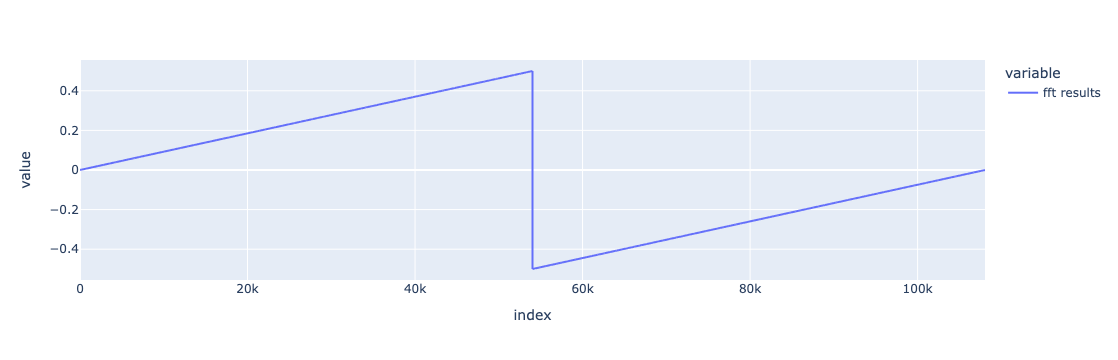

In [54]:
fig = px.line(sample_freq)
fig.show()

## 第六步：变量平稳性分析
针对变量平稳性的分析可以展示数据中的异常变化与波动。

目前包含的平稳性分析方法有：
- ADF
- Phillips-Perron
- DF-GLS
- KPSS
- Zivot-Andrew
- Variance Ratio

In [55]:
# 获取ADF平稳性测试结果
DA.getADF(start_col='pac',end_col='pac')

{'pac': {'Test Statistic': -38.28419329394562,
  'P-value': 0.0,
  'Lags': np.int64(59),
  'Trend': 'c',
  'Summary': <class 'statsmodels.iolib.summary.Summary'>
  """
     Augmented Dickey-Fuller Results   
  Test Statistic                -38.284
  P-value                         0.000
  Lags                               59
  -------------------------------------
  
  Trend: Constant
  Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
  Null Hypothesis: The process contains a unit root.
  Alternative Hypothesis: The process is weakly stationary.
  """}}

In [56]:
# 获取Phillips-Perron平稳性测试结果
DA.getPhillipsPerron(start_col='pac',end_col='pac')

{'pac': {'Test Statistic': np.float64(-44.027509536436334),
  'P-value': 0.0,
  'Lags': 69,
  'Trend': 'c',
  'Summary': <class 'statsmodels.iolib.summary.Summary'>
  """
       Phillips-Perron Test (Z-tau)    
  Test Statistic                -44.028
  P-value                         0.000
  Lags                               69
  -------------------------------------
  
  Trend: Constant
  Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
  Null Hypothesis: The process contains a unit root.
  Alternative Hypothesis: The process is weakly stationary.
  """}}

In [57]:
# 获取DF-GLS平稳性测试结果
DA.getDFGLS(start_col='pac',end_col='pac')

{'pac': {'Test Statistic': -34.29397193231185,
  'P-value': 0.0,
  'Lags': np.int64(59),
  'Trend': 'c',
  'Summary': <class 'statsmodels.iolib.summary.Summary'>
  """
        Dickey-Fuller GLS Results      
  Test Statistic                -34.294
  P-value                         0.000
  Lags                               59
  -------------------------------------
  
  Trend: Constant
  Critical Values: -2.57 (1%), -1.94 (5%), -1.62 (10%)
  Null Hypothesis: The process contains a unit root.
  Alternative Hypothesis: The process is weakly stationary.
  """}}